In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
train = pd.read_csv("data/train.csv", nrows=5 * 10 ** 7)
print(train.columns)
print(train.shape)

Index(['acoustic_data', 'time_to_failure'], dtype='object')
(50000000, 2)


In [31]:
N_SEQ = 150
N_TRAIN = 10

slices = random_sub_sequence_indexes(train['acoustic_data'], N_SEQ, n=N_TRAIN)
features, target = zip(*[subsequence_to_sample(train[sl]) for sl in slices])

def reshape_list_to_input(ls):
    return np.array(ls).reshape((1, -1, 1))

In [41]:
from keras.layers import *


# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(N_SEQ,1)))
model.add(RepeatVector(N_SEQ))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

/Users/westi/Repos/seismic/env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
10/10 [==============================] - 3s 272ms/step - loss: nan
Epoch 2/10
10/10 [==============================] - 3s 270ms/step - loss: nan
Epoch 3/10
10/10 [==============================] - 3s 270ms/step - loss: nan
Epoch 4/10
10/10 [==============================] - 3s 268ms/step - loss: nan
Epoch 5/10
10/10 [==============================] - 3s 267ms/step - loss: nan
Epoch 6/10
10/10 [==============================] - 3s 270ms/step - loss: nan
Epoch 7/10
10/10 [==============================] - 3s 282ms/step - loss: nan
Epoch 8/10
10/10 [==============================] - 3s 267ms/step - loss: nan
Epoch 9/10
10/10 [==============================] - 3s 264ms/step - loss: nan
Epoch 10/10
10/10 [==============================] - 3s 273ms/step - loss: nan


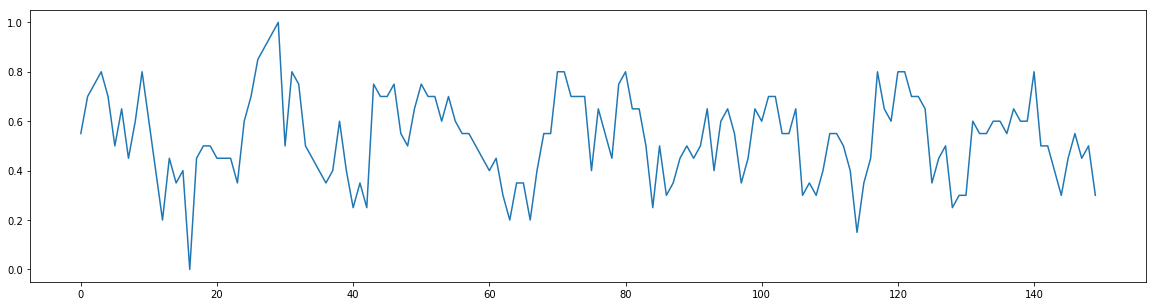

In [39]:
from random import choice
from sklearn.preprocessing import MinMaxScaler


list_input = MinMaxScaler().fit_transform(np.array(choice(features).reshape(-1, 1)))
plt.figure(figsize=(20, 5)); plt.plot(list_input)
in_seq = reshape_list_to_input(list_input)
model.fit(in_seq, in_seq, epochs=10, steps_per_epoch=10)
plt.plot(model.predict(in_seq)[0, :, 0]); None